In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

We will now begin to investigate data with periodic dependencies! 

As required, we generate data using the following scheme:

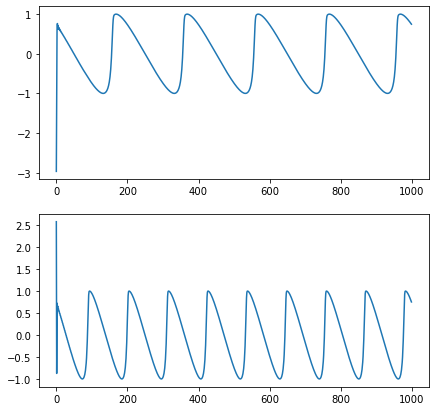

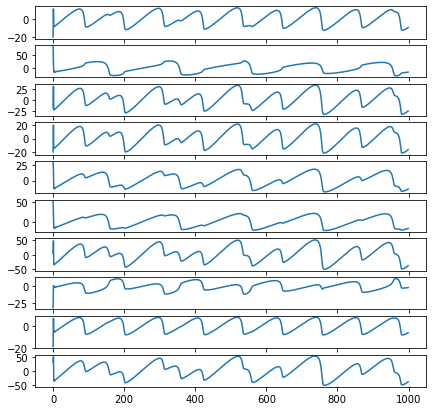

In [40]:
s = np.array([0.005, 0.009]).T
def f(x, t, s):
    return np.cos(2 * np.pi * s * t + x)

m = 10
n = 1000
r = 2
X = np.zeros([r, n])
X[:, 0] = np.random.uniform(-np.pi, np.pi, r)

for i in range(1, n):
    X[:, i] = f(X[:, i - 1], i, s)

# plot X rows
fig, axs = plt.subplots(r, 1, figsize=(7, 7))
for i in range(r):
    axs[i].plot(X[i, :])
plt.show(block=False)
plt.pause(3)

C_true = np.random.normal(-10, 10, [m, r])

Y = C_true @ X

# plot the data
fig, axs = plt.subplots(m, 1, figsize=(7, 7))
for i in range(m):
    axs[i].plot(Y[i, :])
plt.show()

We first define 2 functions that update X and C matrices, using the desired updates we derived previously:
$$
    x_{t} = \frac{\lambda_{x}f_{\theta}(x_{t-1})+y_{t}C_{t-1}}{\lambda_{x}+C_{t-1}^{T}C_{t-1}}
$$

and 

$$
C_{t} = C_{t-1} + \frac{(y_{k_{t}}-C_{t-1}x_{k_{t}})x_{k_{t}}^{T}}{\lambda_{c}+x_{k_{t}}^{T}x_{k_{t}}}
$$

as required.

We assume the model of the form:
$$
x_{t} = f_{\theta}(x_{t-1}) = cos(2s\pi t + x_{t-1})
$$

In [23]:
def update_x(xk, yk, C, lam_x, theta, i):
    res = np.linalg.inv(lam_x + C.T@C)@(lam_x@f(xk, i+1, s)+(C.T @ yk))
    return res

def update_C(xk, yk, C, lam_c):
    up = C + np.outer(yk-C@xk, xk)/(lam_c + xk.T@xk)
    return up

In [24]:
def gen_fac(Y, r, s, lam_c, lam_x, epochs):
    '''
    param: Y: mxn data matrix
    param: r: int, dimension of reduction
    param: s: parameter of cos distribution
    param: lam_c: int, penalisation parameter for C update
    param: lam_x: int, penalisation parameter for x update
    param: epochs: int, number of times iterated over
    
    return: C: fully updated mxr matrix
    return: X: fully updates rxn matrix
    '''
    m, n = Y.shape
    C = random.randn(m, r)
    X = np.zeros((r, n))
    lamX = lam_x * np.identity(r)
    error_list = []
    
    for j in range(epochs):
        for i in range(n):
            yk = Y[:, i]
            xk = X[:, i]
            X[:, i] = update_x(xk, yk, C, lamX, s, i)
            C = update_C(xk, yk, C, lam_c)
            err = np.linalg.norm(Y - C@X)
            error_list.append(err)
            
    return C, X, error_list

In [36]:
s1 = np.array([0.005, 0.009]).T
C, X, error_list = gen_fac(Y, 2, s1, 1, 1, 5)

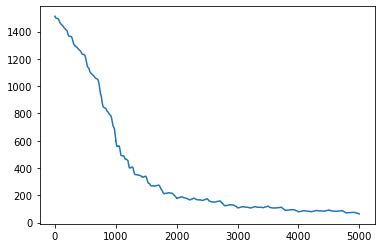

In [37]:
plt.plot(error_list)

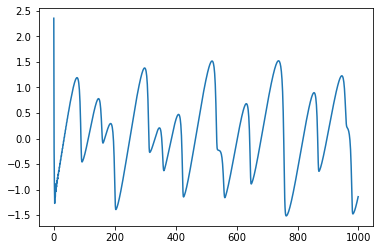

In [38]:
plt.plot(X[0, :])

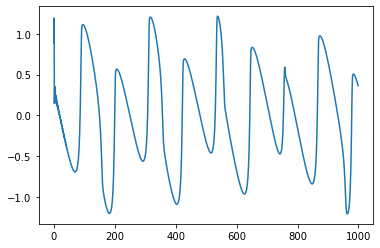

In [39]:
plt.plot(X[1, :])

Try a gridsearch again to optimise parameters of $s$!

In [46]:
grid_vals = np.linspace(0.001, 0.01, 10)
grid_search = np.zeros((10, 10))

for i in range(len(grid_vals)):
    for j in range(len(grid_vals)):
        s = np.array([grid_vals[i], grid_vals[j]])
        C, X, err_list = gen_fac(Y, 2, s, 1, 1, 5)
        grid_search[i][j] = err_list[999]

In [47]:
min_val = np.min(grid_search)
print(np.where(grid_search==min_val))

(array([4]), array([8]))


In [48]:
theta1 = grid_vals[4]
theta2 = grid_vals[8]

print(f"our model computes that the optimum theta values are theta1 = {theta1}, and theta2 = {theta2}")

our model computes that the optimum theta values are theta1 = 0.005, and theta2 = 0.009000000000000001


In [49]:
print("this is so accurate!")

this is so accurate!
